In [179]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import h5py
import yt 

from nbodykit.lab import *

import mpl_scatter_density
# Make the norm object to define the image stretch
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# Matplotlib darkmode + color picker 
plt.style.use("light_mode")
mpl.rcParams['axes.linewidth'] = 2
import yaml
import io

# Read YAML file
with open("../config.yaml", 'r') as stream:
    config = yaml.safe_load(stream)
    
config

{'run_name': 'density_cube_snap_099_full_1024_all_species',
 'input_directory': '/global/cscratch1/sd/james12/Illustris_TNG_Data/TNG_Density_Cubes/simple_density_cubes/',
 'snapfile_root': 99,
 'num_snaps': 1,
 'output_directory': '/global/cscratch1/sd/james12/NEXUS_analysis/Full_Species_1024_snap_099/',
 'xmin': 0.0,
 'xmax': 205000.0,
 'num_scales': 10,
 'nx': 1024,
 'DM_particle_mass_TNG': 0.00398342749867548,
 'GAS_particle_mass_TNG': 0.000743736,
 'DM_particle_mass_Dark': 0.0047271638660809,
 'N_DM': 15625000000,
 'N_GAS': 15625000000,
 'algorithm': 'NEXUS+',
 'simulation_type': 'All'}

In [2]:
total_volume = config["xmax"] ** 3
volume_per_cell = total_volume / (config["nx"]**3)

## Load Snapshot Data for Dark Matter Only

In [3]:
density_file_dm = '/global/cscratch1/sd/james12/Illustris_TNG_Data/TNG_Density_Cubes/simple_density_cubes/density_cube_snap_099_full_1024_dm.npy'

In [4]:
# files = []
# data = []
# coords = []
# for i in range(4):
#     file_i = h5py.File(snapshot_directory_dm + 'snap_099.' + str(i) + '.hdf5', 'r')
#     data_i = file_i['PartType1']
#     coords_i = data_i['Coordinates']
#     files.append(file_i)
#     data.append(data_i)
#     coords.append(coords_i)

# x = np.hstack( [c[:,0] for c in coords] ) #what is hstack?
# y = np.hstack( [c[:,1] for c in coords] )
# z = np.hstack( [c[:,2] for c in coords] )  

In [77]:
density_cube = np.load(density_file_dm)

In [78]:
density_cube = density_cube[:256, :256, :256] 
mass_cube = density_cube * volume_per_cell


In [79]:
M = np.sum(mass_cube)
V = volume_per_cell * (256**3)

(11/0.1)/ (np.max(density_cube))
(15/77)/ (np.max(density_cube))
(50/6)/ (np.max(density_cube))
(24/18)/ (np.max(density_cube))


np.max(density_cube)

10686.562

In [164]:
import scipy.ndimage as ndimg

smoothed_density = ndimg.gaussian_filter(density_cube, sigma=1)
# smoothed_mass = ndimg.gaussian_filter(mass_cube, sigma=0.5)

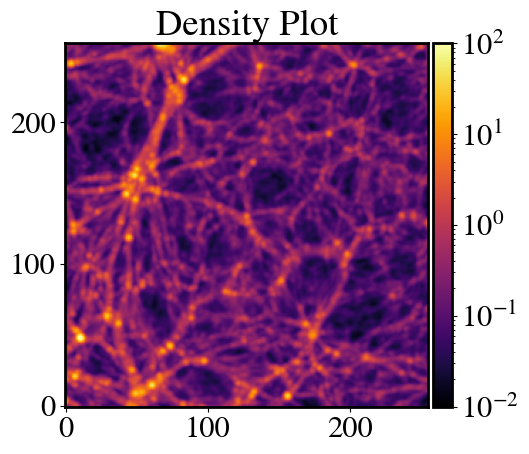

In [165]:
f, (ax2) = plt.subplots(1,1, figsize=(6,5))

ax2.set_title("Density Plot")
im2 = ax2.imshow(smoothed_density[:,:,128], origin='lower', cmap='inferno', norm=mpl.colors.LogNorm(vmin=0.01, vmax=100.0))
divider2 = axgrid.make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im2, cax=cax2)
f.tight_layout()

## Sort Data by Chosen Mass Quantiles

In [207]:
# q1, q2, q3 = np.quantile(smoothed_density, [0.40, 0.80, 0.97]) #nodes, voids, walls, filaments
q1, q2, q3 = np.quantile(smoothed_density, [0.77, 0.95, 0.998]) #nodes, voids, walls, filaments

In [208]:
structure_class = np.zeros(shape=smoothed_density.shape)
structure_class[np.where (smoothed_density<q1)] = 0
structure_class[np.where ((smoothed_density<q2) & (smoothed_density>q1))] = 1
structure_class[np.where ((smoothed_density<q3) & (smoothed_density>q2))] = 2
structure_class[np.where (smoothed_density>q3)] = 3


In [209]:
q1_bool = structure_class == 0
q2_bool = structure_class == 1
q3_bool = structure_class == 2
q4_bool = structure_class == 3

q1_bool = q1_bool.astype(int)
q2_bool = q2_bool.astype(int)
q3_bool = q3_bool.astype(int)
q4_bool = q4_bool.astype(int)


In [210]:
q1_data = density_cube.copy()
q1_data[np.where (structure_class!=0)] = 0.0

q2_data = density_cube.copy()
q2_data[np.where (structure_class!=1)] = 0.0

q3_data = density_cube.copy()
q3_data[np.where (structure_class!=2)] = 0.0

q4_data = density_cube.copy()
q4_data[np.where (structure_class!=3)] = 0.0

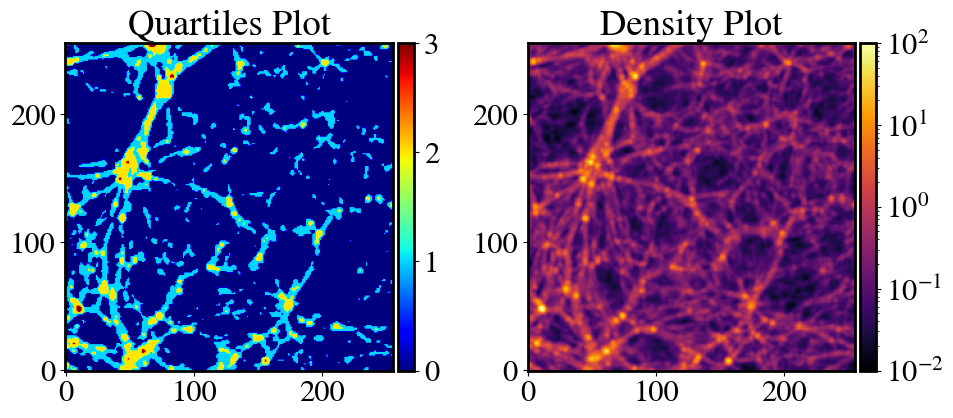

In [211]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title("Quartiles Plot")
im1 = ax1.imshow(structure_class[:,:,128], origin='lower', cmap='jet')
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1, ticks=np.arange(0,4,1))
f.show()

ax2.set_title("Density Plot")
im2 = ax2.imshow(smoothed_density[:,:,128], origin='lower', cmap='inferno', norm=mpl.colors.LogNorm(vmin=0.01, vmax=100.0))
divider2 = axgrid.make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im2, cax=cax2)
f.tight_layout()




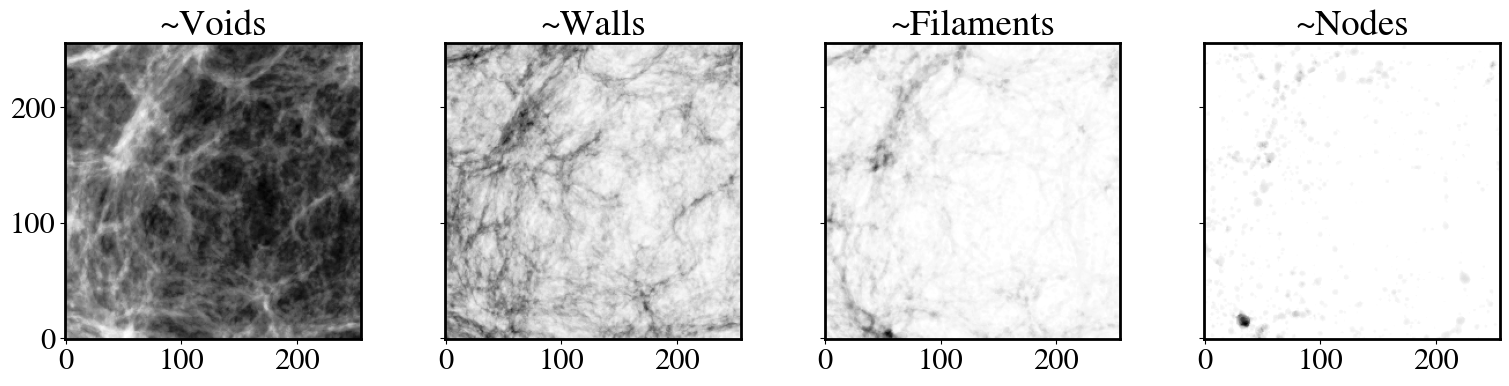

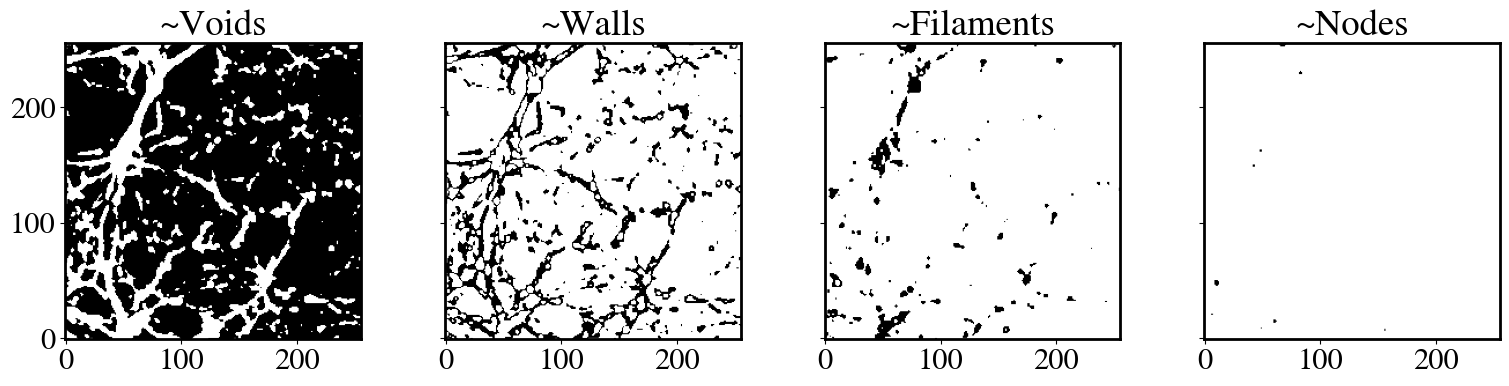

In [212]:
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, sharey=True,figsize=(16,4))

ax1.set_title("~Voids")
im1 = ax1.imshow(np.sum(q1_bool, axis=2), origin='lower', cmap='Greys')
divider1 = axgrid.make_axes_locatable(ax1)
# cax1 = divider1.append_axes("right", size='5%', pad=0.05)
# plt.colorbar(im1, cax=cax1, ticks=np.arange(0,2,1))

ax2.set_title("~Walls")
im2 = ax2.imshow(np.sum(q2_bool, axis=2), origin='lower', cmap='Greys')
divider2 = axgrid.make_axes_locatable(ax2)
# cax2 = divider2.append_axes("right", size='5%', pad=0.05)
# plt.colorbar(im2, cax=cax2, ticks=np.arange(0,2,1))

ax3.set_title("~Filaments")
im3 = ax3.imshow(np.sum(q3_bool, axis=2), origin='lower', cmap='Greys')
divider3 = axgrid.make_axes_locatable(ax3)
# cax3 = divider3.append_axes("right", size='5%', pad=0.05)
# plt.colorbar(im3, cax=cax3, ticks=np.arange(0,2,1))

ax4.set_title("~Nodes")
im4 = ax4.imshow(np.sum(q4_bool, axis=2), origin='lower', cmap='Greys')
divider4 = axgrid.make_axes_locatable(ax4)
# cax4 = divider4.append_axes("right", size='5%', pad=0.05)
# plt.colorbar(im4, cax=cax4, ticks=np.arange(0,2,1))
f.tight_layout()
f.show()



f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, sharey=True,figsize=(16,4))

ax1.set_title("~Voids")
im1 = ax1.imshow(q1_bool[:,:,128], origin='lower', cmap='Greys')
divider1 = axgrid.make_axes_locatable(ax1)
# cax1 = divider1.append_axes("right", size='5%', pad=0.05)
# plt.colorbar(im1, cax=cax1, ticks=np.arange(0,2,1))

ax2.set_title("~Walls")
im2 = ax2.imshow(q2_bool[:,:,128], origin='lower', cmap='Greys')
divider2 = axgrid.make_axes_locatable(ax2)
# cax2 = divider2.append_axes("right", size='5%', pad=0.05)
# plt.colorbar(im2, cax=cax2, ticks=np.arange(0,2,1))

ax3.set_title("~Filaments")
im3 = ax3.imshow(q3_bool[:,:,128], origin='lower', cmap='Greys')
divider3 = axgrid.make_axes_locatable(ax3)
# cax3 = divider3.append_axes("right", size='5%', pad=0.05)
# plt.colorbar(im3, cax=cax3, ticks=np.arange(0,2,1))

ax4.set_title("~Nodes")
im4 = ax4.imshow(q4_bool[:,:,128], origin='lower', cmap='Greys')
divider4 = axgrid.make_axes_locatable(ax4)
# cax4 = divider4.append_axes("right", size='5%', pad=0.05)
# plt.colorbar(im4, cax=cax4, ticks=np.arange(0,2,1))
f.tight_layout()
f.show()



In [216]:
#quartiles
q1_bool_full = np.load("/global/cscratch1/sd/james12/NEXUS_analysis/quartiles/snap_099_full_1024_dm_q1_bool_voids.npy")
q2_bool_full = np.load("/global/cscratch1/sd/james12/NEXUS_analysis/quartiles/snap_099_full_1024_dm_q2_bool_walls.npy")
q3_bool_full = np.load("/global/cscratch1/sd/james12/NEXUS_analysis/quartiles/snap_099_full_1024_dm_q3_bool_filaments.npy")
q4_bool_full = np.load("/global/cscratch1/sd/james12/NEXUS_analysis/quartiles/snap_099_full_1024_dm_q4_bool_nodes.npy")

#nexus
clus_bool = np.load("/global/cscratch1/sd/james12/NEXUS_analysis/DM_only_1024_snap_099/density_cube_snap_099_full_1024_dm_cluster_bool_filter.npy")
fil_bool = np.load("/global/cscratch1/sd/james12/NEXUS_analysis/DM_only_1024_snap_099/density_cube_snap_099_full_1024_dm_filament_bool_filter.npy")
wall_bool = np.load("/global/cscratch1/sd/james12/NEXUS_analysis/DM_only_1024_snap_099/density_cube_snap_099_full_1024_dm_wall_bool_filter.npy")



In [217]:
void_bool = ~(clus_bool + fil_bool + wall_bool) #not where everything else is

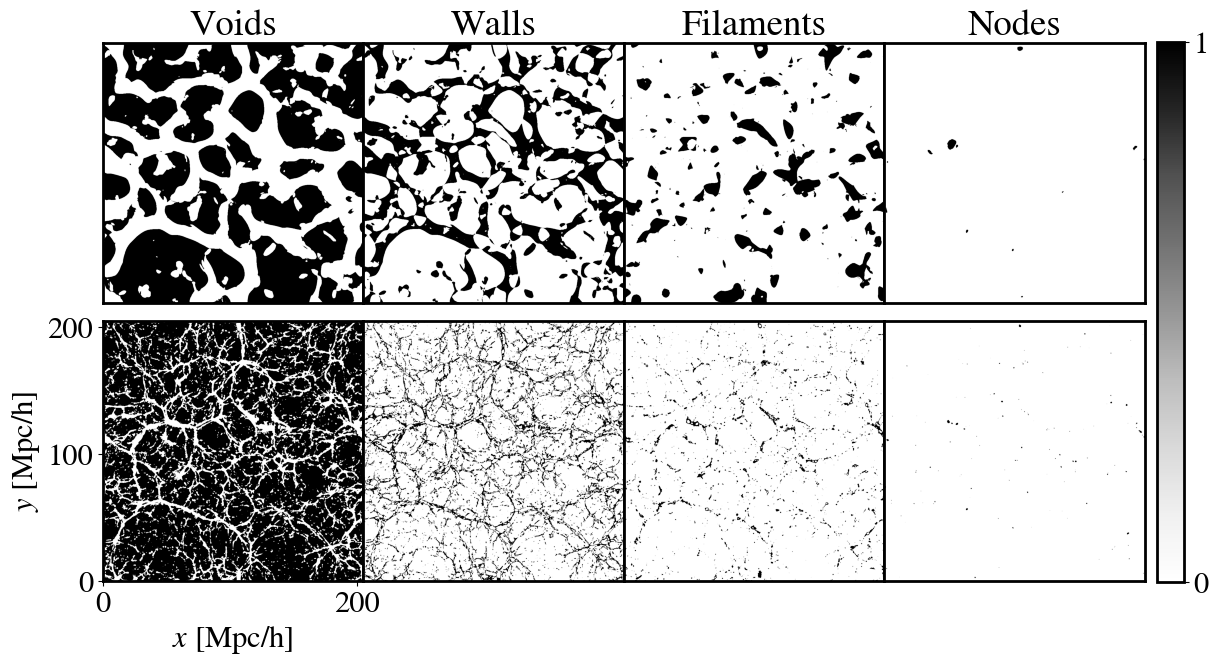

In [218]:
f, axes = plt.subplots(2,4,
                       gridspec_kw={'wspace':0, 'hspace':-0.15},
                       squeeze=True, figsize=(16,8))


z_slice = 128

axes[0,0].set_title("Voids")
axes[0,0].set_yticks([])
axes[0,0].set_xticks([])
im1 = axes[0,0].imshow(void_bool[:,:,z_slice], origin='lower', cmap='Greys',extent=(0,config["xmax"]/1000,0,config["xmax"]/1000))


axes[0,1].set_title("Walls")
im2 = axes[0,1].imshow(wall_bool[:,:,z_slice], origin='lower', cmap='Greys',extent=(0,config["xmax"]/1000,0,config["xmax"]/1000))

axes[0,2].set_title("Filaments")
im3 = axes[0,2].imshow(fil_bool[:,:,z_slice], origin='lower', cmap='Greys',extent=(0,config["xmax"]/1000,0,config["xmax"]/1000))


axes[0,3].set_title("Nodes")
im4 = axes[0,3].imshow(clus_bool[:,:,z_slice], origin='lower', cmap='Greys',extent=(0,config["xmax"]/1000,0,config["xmax"]/1000))

axes[0,1].set_xticks([])
axes[0,2].set_xticks([])
axes[0,3].set_xticks([])

axes[1,0].set_xlabel("$x$ [Mpc/h]")
axes[1,0].set_ylabel("$y$ [Mpc/h]")
im1 = axes[1,0].imshow(q1_bool_full[:,:,z_slice], origin='lower', cmap='Greys',extent=(0,config["xmax"]/1000,0,config["xmax"]/1000))

im2 = axes[1,1].imshow(q2_bool_full[:,:,z_slice], origin='lower', cmap='Greys',extent=(0,config["xmax"]/1000,0,config["xmax"]/1000))

im3 = axes[1,2].imshow(q3_bool_full[:,:,z_slice], origin='lower', cmap='Greys',extent=(0,config["xmax"]/1000,0,config["xmax"]/1000))

im4 = axes[1,3].imshow(q4_bool_full[:,:,z_slice], origin='lower', cmap='Greys',extent=(0,config["xmax"]/1000,0,config["xmax"]/1000))


# plt.colorbar(im4, cax=cax4, ticks=np.arange(0,2,1))

for i in range(4):
    axes[0,i].set_xticks([])
    axes[0,i].set_yticks([])
    if i != 0:
        axes[1,i].set_xticks([])
        axes[1,i].set_yticks([])

f.colorbar(im4,  ax=axes.ravel().tolist(), ticks=[0,1], pad=0.01, shrink=0.894)


f.show()





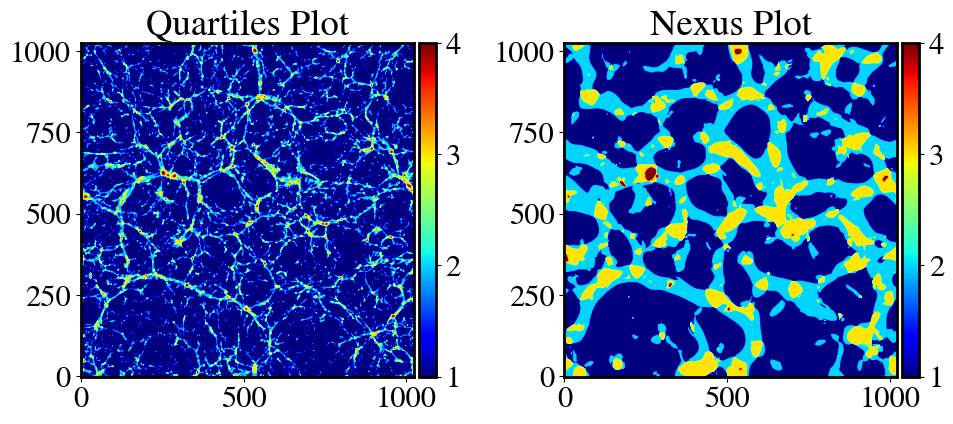

In [219]:
stacked_q = (q1_bool_full[:,:,z_slice] * 1 + q2_bool_full[:,:,z_slice] * 2
             + q3_bool_full[:,:,z_slice] * 3 + q4_bool_full[:,:,z_slice] * 4)

stacked_q_nexus = (void_bool[:,:,z_slice] * 1 + wall_bool[:,:,z_slice] * 2
             + fil_bool[:,:,z_slice] * 3 + clus_bool[:,:,z_slice] * 4)


f, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.set_title("Quartiles Plot")
im1 = ax1.imshow(stacked_q[:,:], origin='lower', cmap='jet')
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1, ticks=np.arange(1,5,1))
f.show()

ax2.set_title("Nexus Plot")
im2 = ax2.imshow(stacked_q_nexus[:,:], origin='lower', cmap='jet')
divider2 = axgrid.make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im2, cax=cax2,ticks=np.arange(1,5,1))
f.tight_layout()

## Measure the Power Spectra

In [11]:
density_mesh = ArrayMesh(density_cube, BoxSize=106500)

q1_mesh = ArrayMesh(q1_data, BoxSize=106500)
q2_mesh = ArrayMesh(q2_data, BoxSize=106500)
q3_mesh = ArrayMesh(q3_data, BoxSize=106500)
q4_mesh = ArrayMesh(q4_data, BoxSize=106500)

In [12]:
result_all = FFTPower(density_mesh, mode='1d')
result_q1 = FFTPower(q1_mesh, mode='1d')
result_q2 = FFTPower(q2_mesh, mode='1d')
result_q3 = FFTPower(q3_mesh, mode='1d')
result_q4 = FFTPower(q4_mesh, mode='1d')

Pk_all = result_all.power

Pk_q1 = result_q1.power
Pk_q2 = result_q2.power
Pk_q3 = result_q3.power
Pk_q4 = result_q4.power
# for k in Pk.attrs:
#     print("%s = %s" %(k, str(Pk.attrs[k])))

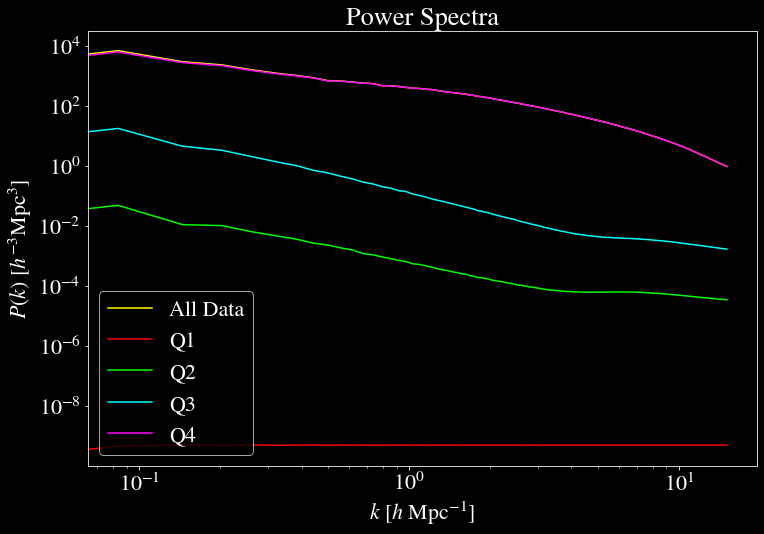

In [13]:
plt.figure(figsize=(12,8))
# print the shot noise subtracted P(k)
plt.loglog((Pk_all['k']) * 1e3, (Pk_all['power'].real - Pk_all.attrs['shotnoise'])*1e-9, label='All Data') #Illustris units are kpc we need to convert to Mpc
plt.loglog((Pk_q1['k']) * 1e3, (Pk_q1['power'].real - Pk_q1.attrs['shotnoise'])*1e-9, label='Q1')
plt.loglog((Pk_q2['k']) * 1e3, (Pk_q2['power'].real - Pk_q2.attrs['shotnoise'])*1e-9, label='Q2')
plt.loglog((Pk_q3['k']) * 1e3, (Pk_q3['power'].real - Pk_q3.attrs['shotnoise'])*1e-9, label='Q3')
plt.loglog((Pk_q4['k']) * 1e3, (Pk_q4['power'].real - Pk_q4.attrs['shotnoise'])*1e-9, label='Q4')
plt.title("Power Spectra")
# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.legend()
plt.show()

# Load in NEXUS+/NEXUS results

In [14]:
NEXUSPLUS_sigs = np.load("output_files/sigs_NEXUSPLUS.npy")
NEXUS_sigs = np.load("output_files/sigs_NEXUS.npy")

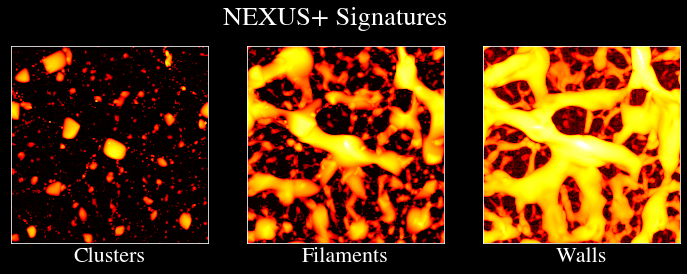

In [15]:

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4))
f.suptitle("NEXUS+ Signatures")
ax1.imshow(NEXUSPLUS_sigs[:,:,300,0], origin="lower", cmap="hot",
           norm=mpl.colors.LogNorm(vmin=.001,vmax=10000))
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel("Clusters")
ax2.imshow(NEXUSPLUS_sigs[:,:,300,1], origin="lower", cmap="hot",
           norm=mpl.colors.LogNorm(vmin=.001,vmax=10000))
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel("Filaments")
ax3.imshow(NEXUSPLUS_sigs[:,:,300,2], origin="lower", cmap="hot",
           norm=mpl.colors.LogNorm(vmin=.001,vmax=10000))
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlabel("Walls")

plt.show()

In [97]:
clusbool = np.load("output_files/clusbools.npy")
filbool = np.load("output_files/filbools.npy")
wallbool = np.load("output_files/wallbools.npy")

In [17]:
print(np.shape(clusbool))
print(np.shape(density_cube))

(512, 512, 512)
(512, 512, 512)


In [1]:
plt.figure(figsize=(8,8))
plt.imshow(density_cube[:,:,300], origin="lower", cmap="inferno",
           norm=mpl.colors.LogNorm(vmin=.001,vmax=1000))
plt.colorbar()
plt.tight_layout()

NameError: name 'plt' is not defined

In [19]:
filtered_clus = density_cube
filtered_clus = filtered_clus * clusbool.astype(int)

filtered_fil = density_cube
filtered_fil = filtered_fil * filbool.astype(int)

filtered_wall = density_cube
filtered_wall = filtered_wall * wallbool.astype(int)


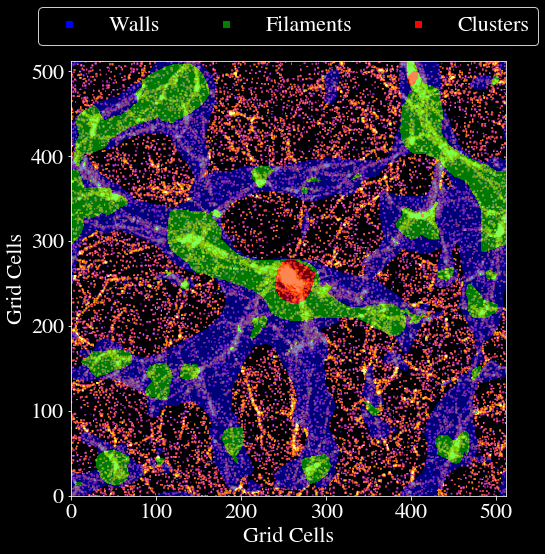

In [36]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

Reds = cm.get_cmap('Reds', 2)
newcolors = Reds(np.arange(0,2,1))
newcolors[0, :] = np.array([1,1,1,0])
newcolors[1, :] = np.array([1,0,0,.8])
newcmp_Red = ListedColormap(newcolors)

Greens = cm.get_cmap('Greens', 2)
newcolors = Greens(np.arange(0,2,1))
newcolors[0, :] = np.array([1,1,1,0])
newcolors[1, :] = np.array([0,1,0,.8])
newcmp_Green = ListedColormap(newcolors)

Blues = cm.get_cmap('Blues', 2)
newcolors = Blues(np.arange(0,2,1))
newcolors[0, :] = np.array([1,1,1,0])
newcolors[1, :] = np.array([0,0,1,.8])
newcmp_Blue = ListedColormap(newcolors)

# # Create new colormap
# my_cmap = ListedColormap(my_cmap)




plt.figure(figsize=(12,8))
plt.imshow(density_cube[:,:,300], origin="lower", cmap="inferno",
           norm=mpl.colors.LogNorm(vmin=.01,vmax=10), alpha=1.0)
plt.imshow(wallbool[:,:,300], origin="lower", cmap=newcmp_Blue, alpha=0.6)
plt.plot([],[],"bs", label="Walls")
plt.imshow(filbool[:,:,300], origin="lower", cmap=newcmp_Green, alpha=0.6)
plt.plot([],[],"gs", label="Filaments")
plt.imshow(clusbool[:,:,300], origin="lower", cmap=newcmp_Red, alpha=0.6)
plt.plot([],[],"rs", label="Clusters")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          fancybox=True, shadow=True, ncol=3)
plt.xlabel("Grid Cells")
plt.ylabel("Grid Cells")
# plt.savefig("Images/python_NEXUSPLUS_512_all_components.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

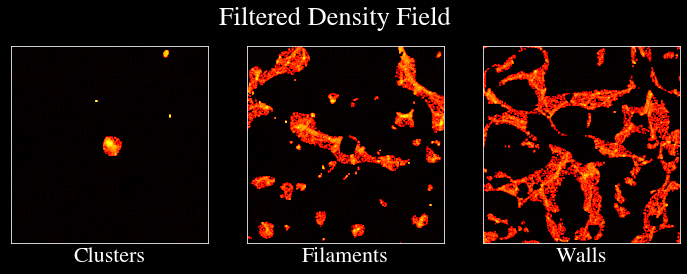

In [122]:

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4))
f.suptitle("Filtered Density Field")
ax1.imshow(filtered_clus[:,:,300], origin="lower", cmap="hot",
           norm=mpl.colors.LogNorm(vmin=.0001,vmax=10000))
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel("Clusters")
ax2.imshow(filtered_fil[:,:,300], origin="lower", cmap="hot",
           norm=mpl.colors.LogNorm(vmin=.0001,vmax=10000))
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel("Filaments")
ax3.imshow(filtered_wall[:,:,300], origin="lower", cmap="hot",
           norm=mpl.colors.LogNorm(vmin=.0001,vmax=10000))
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xlabel("Walls")

plt.show()

# Make Comparison to Quartiles

In [37]:
density_mesh = ArrayMesh(density_cube, BoxSize=106500)

clus_NEXUS_mesh = ArrayMesh(filtered_clus, BoxSize=106500)
fil_NEXUS_mesh = ArrayMesh(filtered_fil, BoxSize=106500)
wall_NEXUS_mesh = ArrayMesh(filtered_wall, BoxSize=106500)

q1_mesh = ArrayMesh(q1_data, BoxSize=106500)
q2_mesh = ArrayMesh(q2_data, BoxSize=106500)
q3_mesh = ArrayMesh(q3_data, BoxSize=106500)
q4_mesh = ArrayMesh(q4_data, BoxSize=106500)

In [39]:
result_all = FFTPower(density_mesh, mode='1d')
result_q1 = FFTPower(q1_mesh, mode='1d')
result_q2 = FFTPower(q2_mesh, mode='1d')
result_q3 = FFTPower(q3_mesh, mode='1d')
result_q4 = FFTPower(q4_mesh, mode='1d')

result_NEXUS_clus = FFTPower(clus_NEXUS_mesh, mode='1d')
result_NEXUS_fil = FFTPower(fil_NEXUS_mesh, mode='1d')
result_NEXUS_wall = FFTPower(wall_NEXUS_mesh, mode='1d')

Pk_all = result_all.power

Pk_q1 = result_q1.power
Pk_q2 = result_q2.power
Pk_q3 = result_q3.power
Pk_q4 = result_q4.power

pk_clus = result_NEXUS_clus.power
pk_fil = result_NEXUS_fil.power
pk_wall = result_NEXUS_wall.power


# for k in Pk.attrs:
#     print("%s = %s" %(k, str(Pk.attrs[k])))

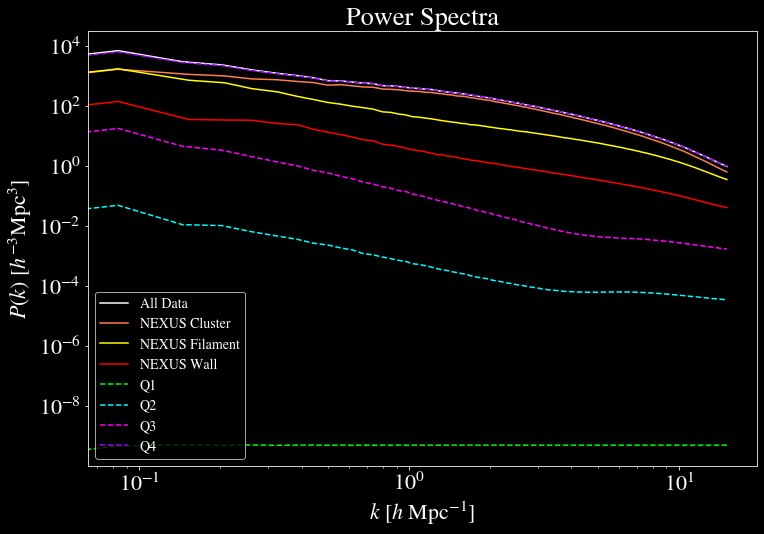

In [56]:
plt.figure(figsize=(12,8))
# print the shot noise subtracted P(k)
plt.loglog((Pk_all['k']) * 1e3, (Pk_all['power'].real - Pk_all.attrs['shotnoise'])*1e-9, label='All Data', color="white") #Illustris units are kpc we need to convert to Mpc
plt.loglog((pk_clus['k']) * 1e3, (pk_clus['power'].real - pk_clus.attrs['shotnoise'])*1e-9, label='NEXUS Cluster', color="coral")
plt.loglog((pk_fil['k']) * 1e3, (pk_fil['power'].real - pk_fil.attrs['shotnoise'])*1e-9, label='NEXUS Filament')
plt.loglog((pk_wall['k']) * 1e3, (pk_wall['power'].real - pk_wall.attrs['shotnoise'])*1e-9, label='NEXUS Wall')
plt.loglog((Pk_q1['k']) * 1e3, (Pk_q1['power'].real - Pk_q1.attrs['shotnoise'])*1e-9, label='Q1', linestyle="--")
plt.loglog((Pk_q2['k']) * 1e3, (Pk_q2['power'].real - Pk_q2.attrs['shotnoise'])*1e-9, label='Q2',linestyle="--")
plt.loglog((Pk_q3['k']) * 1e3, (Pk_q3['power'].real - Pk_q3.attrs['shotnoise'])*1e-9, label='Q3',linestyle="--")
plt.loglog((Pk_q4['k']) * 1e3, (Pk_q4['power'].real - Pk_q4.attrs['shotnoise'])*1e-9, label='Q4',linestyle="--")

plt.title("Power Spectra")
# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.legend(fontsize=14)
# plt.savefig("Images/compare_pk_nexus_quartiles.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [159]:
DM_particle_mass = 0.302538487429177 # in units of 1e10 Msun/h
N_DM = 244140625 
N_cells = np.size(density_cube,0) * np.size(density_cube,1) * np.size(density_cube,2)
# an average grid cell has 
mass_of_average_cell = DM_particle_mass * N_DM / N_cells
total_mass = DM_particle_mass * N_DM


total_volume = (106500/8)**3 #Mpc^3
volume_per_cell = ((1/512)*total_volume)**3 

print(volume_per_cell/(1000)

9.784231147082388e+19


In [98]:
num_Q4_cells = len(q4_bool[np.where (q4_bool==1)])
num_Q3_cells = len(q3_bool[np.where (q3_bool==1)])
num_Q2_cells = len(q2_bool[np.where (q2_bool==1)])
num_Q1_cells = len(q1_bool[np.where (q1_bool==1)])

num_clus_cells = len(clusbool[np.where (clusbool==1)])
num_wall_cells = len(wallbool[np.where (wallbool==1)])
num_fil_cells = len(filbool[np.where (filbool==1)])


6710886
20132658
18596350
88777834
744159
34875929
19260630


In [163]:
volume_frac_q4 = (num_Q4_cells/N_cells * total_volume) / (total_volume)
volume_frac_q3 = (num_Q3_cells/N_cells * total_volume) / total_volume
volume_frac_q2 = (num_Q2_cells/N_cells * total_volume) / total_volume
volume_frac_q1 = (num_Q1_cells/N_cells * total_volume) / total_volume

mass_frac_q4 = (num_Q4_cells/N_cells * total_mass) / total_mass

volume_frac_clus = (num_clus_cells/N_cells * total_volume) / total_volume
volume_frac_wall = (num_wall_cells/N_cells * total_volume) / total_volume
volume_frac_fil = (num_fil_cells/N_cells * total_volume) / total_volume
volume_frac_voids = 1 - (volume_frac_clus + volume_frac_wall + volume_frac_fil)

print("The volume percentage of Q4 is {0:0.0f}%".format(volume_frac_q4*100))
print("The volume percentage of Q3 is {0:0.0f}%".format(volume_frac_q3*100))
print("The volume percentage of Q2 is {0:0.0f}%".format(volume_frac_q2*100))
print("The volume percentage of Q1 is {0:0.0f}%".format(volume_frac_q1*100))

print("The volume percentage of Clusters is {0:0.0f}%".format(volume_frac_clus*100))
print("The volume percentage of Filaments is {0:0.0f}%".format(volume_frac_fil*100))
print("The volume percentage of Walls is {0:0.0f}%".format(volume_frac_wall*100))
print("The volume percentage of Voids is {0:0.0f}%".format(volume_frac_voids*100))

The volume percentage of Q4 is 5%
The volume percentage of Q3 is 15%
The volume percentage of Q2 is 14%
The volume percentage of Q1 is 66%
The volume percentage of Clusters is 1%
The volume percentage of Filaments is 14%
The volume percentage of Walls is 26%
The volume percentage of Voids is 59%


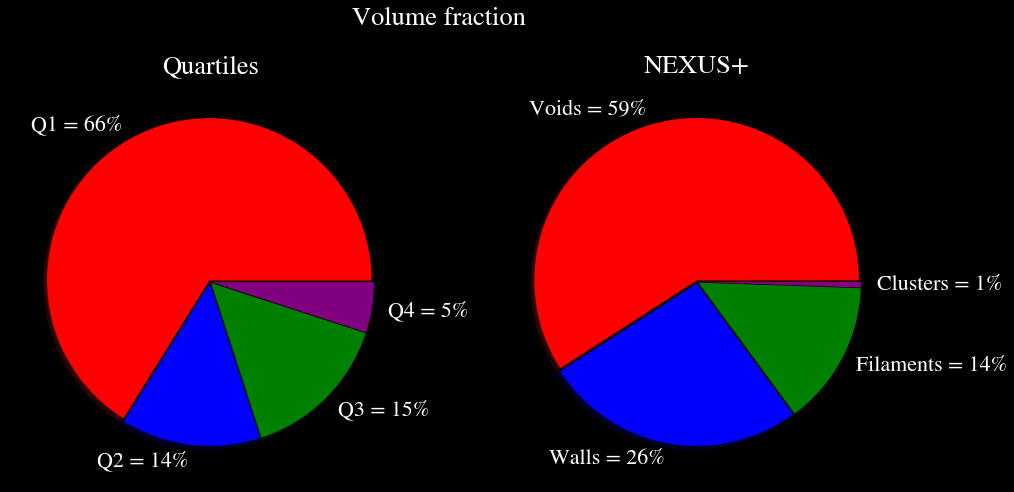

In [152]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))
f.suptitle("Volume fraction")
ax1.pie(np.array([volume_frac_q1, volume_frac_q2, volume_frac_q3,volume_frac_q4]), 
        colors=['red','blue','green', 'purple'],radius=1,
        explode=[.01,.01,.01,.01], labels=["Q1 = {0:0.0f}%".format(volume_frac_q1*100),
                                           "Q2 = {0:0.0f}%".format(volume_frac_q2*100),
                                           "Q3 = {0:0.0f}%".format(volume_frac_q3*100),
                                           "Q4 = {0:0.0f}%".format(volume_frac_q4*100)],
        shadow=True,labeldistance=1.1)
ax1.set_title("Quartiles")

ax2.pie(np.array([volume_frac_voids, volume_frac_wall, volume_frac_fil,volume_frac_clus]), 
        colors=['red','blue','green', 'purple'],radius=1,
        explode=[.01,.01,.01,.01], labels=["Voids = {0:0.0f}%".format(volume_frac_voids*100),
                                           "Walls = {0:0.0f}%".format(volume_frac_wall*100),
                                           "Filaments = {0:0.0f}%".format(volume_frac_fil*100),
                                           "Clusters = {0:0.0f}%".format(volume_frac_clus*100)],
        shadow=True,labeldistance=1.1)
ax2.set_title("NEXUS+")

# f.tight_layout()
# plt.savefig("Images/pie_chart_compare_pk_nexus_quartiles.png", format="png", dpi=300, bbox_inches="tight")
f.show()
